<a href="https://colab.research.google.com/github/zacst/if3270-praktikum-3/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IF3270 Machine Learning | Praktikum

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.


Group Number: 85

Group Members:
- Zachary Samuel Tobing (13522016)

### Download Data with gdown

In [ ]:
%pip install gdown

In [ ]:
import gdown
url = "https://drive.google.com/uc?export=download&id=1obePZndeoytAGeaB-T01nwjzF2xlGojM"
output = 'dataset.zip'
gdown.download(url, output)

Downloading...
From: https://drive.google.com/uc?export=download&id=1obePZndeoytAGeaB-T01nwjzF2xlGojM
To: /content/dataset.zip
100%|██████████| 47.2k/47.2k [00:00<00:00, 35.2MB/s]


'dataset.zip'

In [ ]:
!unzip dataset.zip

Archive:  dataset.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


### Download data with Kaggle API (UNUSED, USED GDOWN)

In [ ]:
# %pip install kaggle

In [ ]:
# !kaggle competitions download -c praktikum-3-if-3270-ml

In [ ]:
# !unzip praktikum-3-if-3270-ml.zip

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np

## Import Dataset

In [ ]:
# Dataset loaded into current directory

# Load dataset
train_file = 'train.csv'
test_file = 'test.csv'

# Read CSV
train_data = pd.read_csv(train_file, parse_dates=['time'])
test_data = pd.read_csv(test_file, parse_dates=['time'])

# 1. Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis. Use simple statistical analysis to get a grip on the used data

In [ ]:
import pandas as pd

# Display the first few rows of the training data
print("=== Head of Training Data ===")
print(train_data.head())

# Display descriptive statistics of the training data
print("\n=== Descriptive Statistics of Training Data ===")
print(train_data.describe())

# Display information about the training data
print("\n=== Info of Training Data ===")
print(train_data.info())

# Display the first few rows of the testing data
print("\n=== Head of Testing Data ===")
print(test_data.head())

# Display descriptive statistics of the testing data
print("\n=== Descriptive Statistics of Testing Data ===")
print(test_data.describe())

# Display information about the testing data
print("\n=== Info of Testing Data ===")
print(test_data.info())

# Insights
print("\n=== Insights ===")
print("1. The training data contains {} rows and {} columns.".format(train_data.shape[0], train_data.shape[1]))
print("2. The testing data contains {} rows and {} columns.".format(test_data.shape[0], test_data.shape[1]))
print("3. The 'time' column is in datetime format, which is useful for time series analysis.")
print("4. The 'h1' column in the training data is the label we want to predict.")
print("5. The 'h1' column in the testing data is the target variable we need to predict.")
print("6. The training data has some missing values, which need to be handled before modeling.")
print("7. The 'h1' column in the training data has a range of values, indicating variability in the target variable.")
print("8. The 'h1' column in the testing data has only 1 value, the number '1'.")
print("9. The training data has a time range from {} to {}.".format(train_data['time'].min(), train_data['time'].max()))
print("10. The testing data has a time range from {} to {}.".format(test_data['time'].min(), test_data['time'].max()))

=== Head of Training Data ===
        time       h1
0 2022-01-01  16853.0
1 2022-01-02  14155.0
2 2022-01-03  14439.0
3 2022-01-04  11273.0
4 2022-01-05  10750.0

=== Descriptive Statistics of Training Data ===
                      time             h1
count                 8500    8500.000000
mean   2033-08-20 12:00:00   68741.047176
min    2022-01-01 00:00:00      75.000000
25%    2027-10-26 18:00:00    4656.000000
50%    2033-08-20 12:00:00   15448.000000
75%    2039-06-15 06:00:00  142834.500000
max    2045-04-09 00:00:00  288630.000000
std                    NaN   74838.021892

=== Info of Training Data ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    8500 non-null   datetime64[ns]
 1   h1      8500 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.9 KB
None

=== Head of Testing Data ===
  

# 2. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

def load_and_split_data(train_file, test_file, test_size=0.2, random_state=42):
    train_data = pd.read_csv(train_file, parse_dates=['time'])
    test_data = pd.read_csv(test_file, parse_dates=['time'])

    return train_data, test_data

def split_train_validation(X, y, test_size=0.2, random_state=42):
    X_train, X_val, y_train, y_val = train_test_split(
        # Preserve time order
        X, y, test_size=test_size, shuffle=False
    )
    return X_train, X_val, y_train, y_val

# 3. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def clean_and_preprocess_data(train_data, window_size=100):
    # --- Cleaning ---

    # Drop duplicate rows
    train_data = train_data.drop_duplicates()

    # Handle missing values (e.g., interpolate or fill forward)
    train_data['h1'] = train_data['h1'].interpolate(method='linear')
    train_data = train_data.dropna(subset=['h1'])

    # Ensure it's sort by time
    train_data = train_data.sort_values(by='time')

    # Reset index after cleaning
    train_data = train_data.reset_index(drop=True)

    # --- Preprocessing ---

    # Normalize the target column due to high variance
    scaler = MinMaxScaler()
    h1_scaled = scaler.fit_transform(train_data[['h1']])

    # Create sequences for RNN (list of timestamps for a particular timestamp)
    X, y = [], []
    for i in range(window_size, len(h1_scaled)):
        X.append(h1_scaled[i-window_size:i])
        y.append(h1_scaled[i])

    X = np.array(X)
    y = np.array(y)

    return X, y, scaler, train_data

# Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [ ]:
# from sklearn.pipeline import Pipeline

# # Note: You can add or delete preprocessing components from this pipeline

# pipe = Pipeline([("imputer", FeatureImputer()),
#                  ("featurecreator", FeatureCreator()),
#                  ("scaler", FeatureScaler()),
#                  ("encoder", FeatureEncoder())])

# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

In [ ]:
# # Your code should work up until this point
# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

or create your own here

In [ ]:
def preprocessing_pipeline(train_file, test_file, window_size=100, val_ratio=0.2):
    # Load CSV
    train_data, test_data = load_and_split_data(train_file, test_file)

    # Cleaning and Preprocessing Data
    X, y, scaler, cleaned_train_data = clean_and_preprocess_data(train_data, window_size=window_size)

    # Splitting Data
    X_train, X_val, y_train, y_val = split_train_validation(X, y, test_size=val_ratio)

    return X_train, X_val, y_train, y_val, test_data, scaler, cleaned_train_data


# 4. Modeling and Validation

Modeling is the process of building a machine learning model to solve a particular problem, or in the context of this task, predicting each value in time. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## 4.1 Recurrent Neural Network

You need to build and compare two models:
- Build your own model with RNN architecture using PyTorch/Tensorflow.
- Build your own model with LSTM architecture using PyTorch/Tensorflow.


### 4.1.1 Build Your Own Model (RNN)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

def train_rnn_model(X_train, y_train, X_val, y_val, units=64, epochs=10, batch_size=32):
    timesteps = X_train.shape[1]
    features = X_train.shape[2]

    model = Sequential([
        SimpleRNN(units, activation='tanh', input_shape=(timesteps, features), return_sequences=False),
        Dropout(0.2),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse', metrics=[RootMeanSquaredError()])

    # Use EarlyStopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_val, y_val), callbacks=[early_stopping])

    # Plot training history
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title("RNN Training vs Validation Loss")
    plt.show()

    return model, history

def predict_future(model, test_data, scaler, window_size, cleaned_train_data):
    # Get the last `window_size` h1 values from cleaned training data
    initial_values = cleaned_train_data['h1'].values[-window_size:]

    # Scale these values
    sequence = scaler.transform(initial_values.reshape(-1, 1))

    test_predictions = []

    for _ in range(len(test_data)):
        # Predict the next value
        pred_scaled = model.predict(np.expand_dims(sequence, axis=0), verbose=0)
        pred_value = scaler.inverse_transform(pred_scaled)[0][0]
        test_predictions.append(pred_value)

        # Slide the window
        sequence = np.vstack([sequence[1:], pred_scaled])

    # Attach predictions to test_data
    test_data = test_data.copy()
    test_data['predicted_h1'] = test_predictions
    return test_data

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


210/210 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.0161 - root_mean_squared_error: 0.1196 - val_loss: 7.4410e-04 - val_root_mean_squared_error: 0.0273
Epoch 2/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0035 - root_mean_squared_error: 0.0589 - val_loss: 6.3784e-04 - val_root_mean_squared_error: 0.0253
Epoch 3/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0030 - root_mean_squared_error: 0.0545 - val_loss: 5.5058e-04 - val_root_mean_squared_error: 0.0235
Epoch 4/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0025 - root_mean_squared_error: 0.0495 - val_loss: 5.0943e-04 - val_root_mean_squared_error: 0.0226
Epoch 5/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0023 - root_mean_squared_error: 0.0478 - val_loss: 5.5050e-04 - val_root_mean_squared_error: 0.0235
Epoch 6/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0020 - root_mean_squared_error: 0.0449 - val_loss: 4.9079e-04 - val_root_mean_squared_error: 0.0222
Epoch 7/10
210/210 ━━━━━━━━━━━━━━

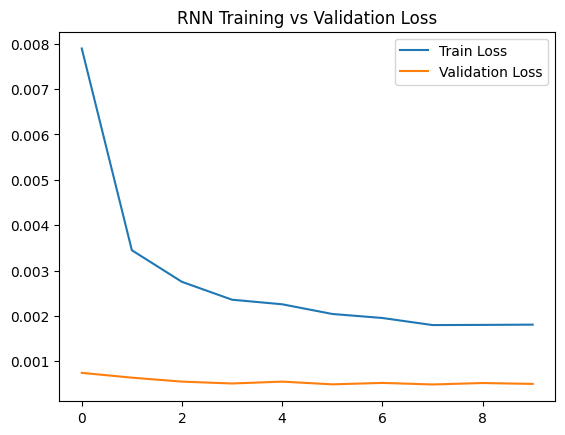

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


           time  h1   predicted_h1
0    2045-04-10   1  128319.335938
1    2045-04-11   1  132471.312500
2    2045-04-12   1  131715.078125
3    2045-04-13   1  131278.718750
4    2045-04-14   1  125087.273438
...         ...  ..            ...
1495 2049-05-14   1   63202.757812
1496 2049-05-15   1   63202.449219
1497 2049-05-16   1   63202.136719
1498 2049-05-17   1   63201.839844
1499 2049-05-18   1   63201.542969

[1500 rows x 3 columns]


In [ ]:
# Training and Testing Files
train_file = 'train.csv'
test_file = 'test.csv'

# Preprocessing Pipeline
X_train, X_val, y_train, y_val, test_data, scaler, cleaned_train_data = preprocessing_pipeline(
    train_file, test_file, window_size=100, val_ratio=0.2
)

# Training RNN Model
rnn_model, rnn_history = train_rnn_model(X_train, y_train, epochs=10, batch_size=32, units=64, X_val=X_val, y_val=y_val)

# Predict
rnn_test_predictions = predict_future(rnn_model, test_data, scaler, window_size=100, cleaned_train_data=cleaned_train_data)

# Display Test Prediction
print(rnn_test_predictions[['time', 'h1', 'predicted_h1']])

### 4.1.2 Build Your Own Model (LSTM)

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# 2. Define the LSTM model
def train_lstm_model(X_train, y_train, X_val, y_val, units=64, epochs=20, batch_size=32):
    timesteps = X_train.shape[1]
    features = X_train.shape[2]

    model = Sequential([
        LSTM(units, activation='relu', input_shape=(timesteps, features), return_sequences=False),
        Dropout(0.2),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse', metrics=[RootMeanSquaredError()])

    # Use EarlyStopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), callbacks=[early_stopping])

    # Plot training history
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.show()

    return model, history

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


210/210 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - loss: 0.0326 - root_mean_squared_error: 0.1698 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0378
Epoch 2/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0044 - root_mean_squared_error: 0.0666 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0366
Epoch 3/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0041 - root_mean_squared_error: 0.0642 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0349
Epoch 4/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - loss: 0.0040 - root_mean_squared_error: 0.0629 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0334
Epoch 5/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0037 - root_mean_squared_error: 0.0604 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0320
Epoch 6/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - loss: 0.0034 - root_mean_squared_error: 0.0585 - val_loss: 9.9267e-04 - val_root_mean_squared_error: 0.0315
Epoch 7/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/

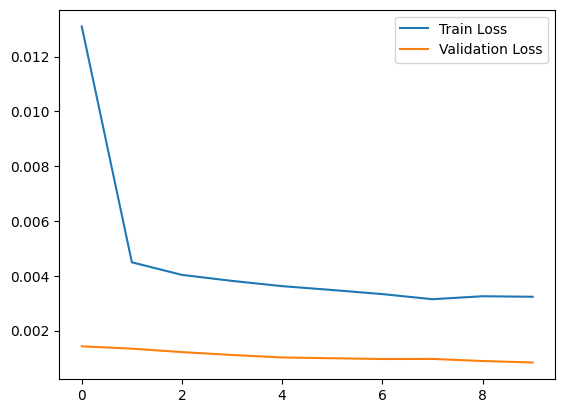

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


           time  h1   predicted_h1
0    2045-04-10   1  136883.734375
1    2045-04-11   1  138032.328125
2    2045-04-12   1  138956.781250
3    2045-04-13   1  139940.812500
4    2045-04-14   1  140964.671875
...         ...  ..            ...
1495 2049-05-14   1  166070.609375
1496 2049-05-15   1  166070.609375
1497 2049-05-16   1  166070.609375
1498 2049-05-17   1  166070.609375
1499 2049-05-18   1  166070.609375

[1500 rows x 3 columns]


In [ ]:
# Training and Testing Files
train_file = 'train.csv'
test_file = 'test.csv'

# Preprocessing Pipeline
X_train, X_val, y_train, y_val, test_data, scaler, cleaned_train_data = preprocessing_pipeline(
    train_file, test_file, window_size=100, val_ratio=0.2
)

# Training LSTM Model
lstm_model, lstm_history = train_lstm_model(X_train, y_train, epochs=10, batch_size=32, units=64, X_val=X_val, y_val=y_val)

# Predict
lstm_test_predictions = predict_future(model=lstm_model, test_data=test_data, scaler=scaler, window_size=100, cleaned_train_data=cleaned_train_data)

# Display Test Predictions
print(lstm_test_predictions[['time', 'h1', 'predicted_h1']])

## 4.2 Validation

Validation is the process of evaluating a trained model using a validation set or cross-validation method. It provides metrics that help determine the necessary steps for the next iteration of model development.  

For validation, the metric used is **macro f1-score**. A higher f1-score indicates better model calibration.  

### Required Validation Results  
The validation results that must be included in the notebook are:  
1. The validation results from the required baseline models.  
2. The validation results from the final submission model on **Kaggle**.  

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


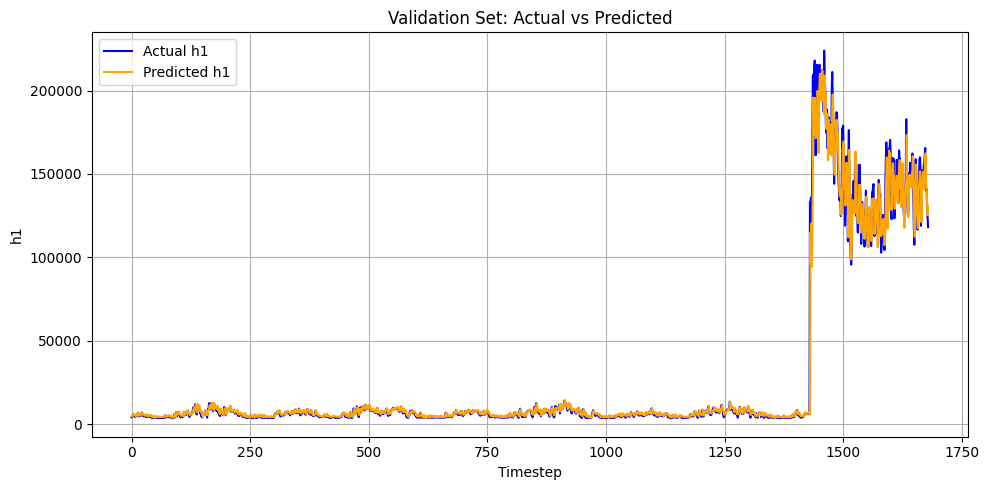

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


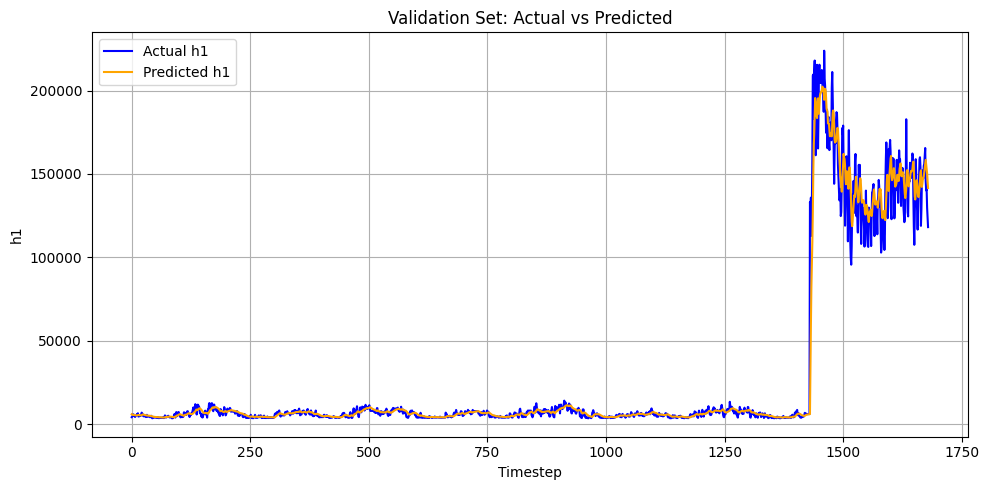

In [ ]:
import matplotlib.pyplot as plt

def plot_validation_results(model, X_val, y_val, scaler):
    # Predict using the trained model
    y_pred_scaled = model.predict(X_val)

    # Inverse transform predictions and ground truth to original scale
    y_pred = scaler.inverse_transform(y_pred_scaled)
    y_true = scaler.inverse_transform(y_val.reshape(-1, 1))

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(y_true, label='Actual h1', color='blue')
    plt.plot(y_pred, label='Predicted h1', color='orange')
    plt.title('Validation Set: Actual vs Predicted')
    plt.xlabel('Timestep')
    plt.ylabel('h1')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# RNN
plot_validation_results(rnn_model, X_val, y_val, scaler)

# LSTM
plot_validation_results(lstm_model, X_val, y_val, scaler)

## Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set

In [ ]:
import pandas as pd

# Save predictions
def save_predictions_to_csv(test_predictions, output_csv='test_predictions.csv'):
    # Extract relevant columns
    predictions_df = test_predictions[['time', 'predicted_h1']].rename(columns={'predicted_h1': 'h1'})

    # Save to CSV
    predictions_df.to_csv(output_csv, index=False)
    print(f"Predictions saved to {output_csv}")

# RNN
save_predictions_to_csv(rnn_test_predictions, output_csv='rnn_predictions.csv')

# LSTM
save_predictions_to_csv(lstm_test_predictions, output_csv='lstm_predictions.csv')

Predictions saved to rnn_predictions.csv
Predictions saved to lstm_predictions.csv


# 5. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

1. What is the error distribution between classes? Do most misclassifications come from one class?
2. Are there more false positives or false negatives?
3. Do occlusions or unusual angles contribute to errors?
4. Are the misclassifications random or do they follow a certain pattern?
5. etc..


=== RNN Model Analysis ===


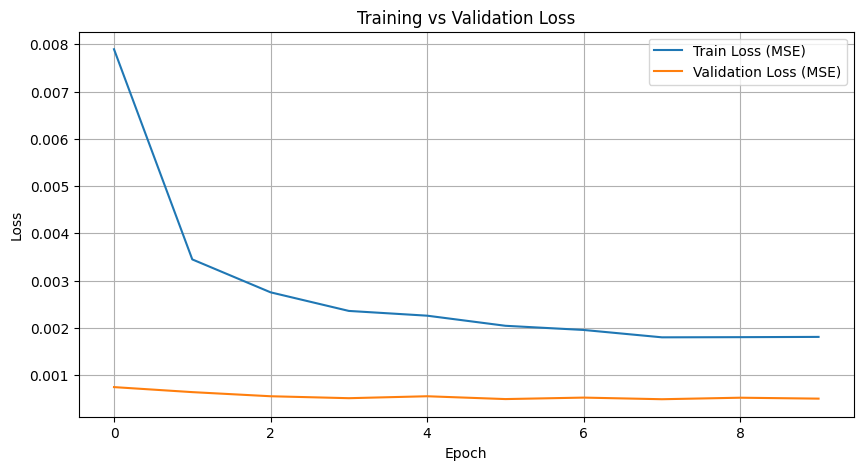

Model Evaluation:
  MSE: 0.0005
  RMSE: 0.0221
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

Prediction Metrics:
  MAE: 0.0081
  RMSE: 0.0221
  MAPE: 14.02%


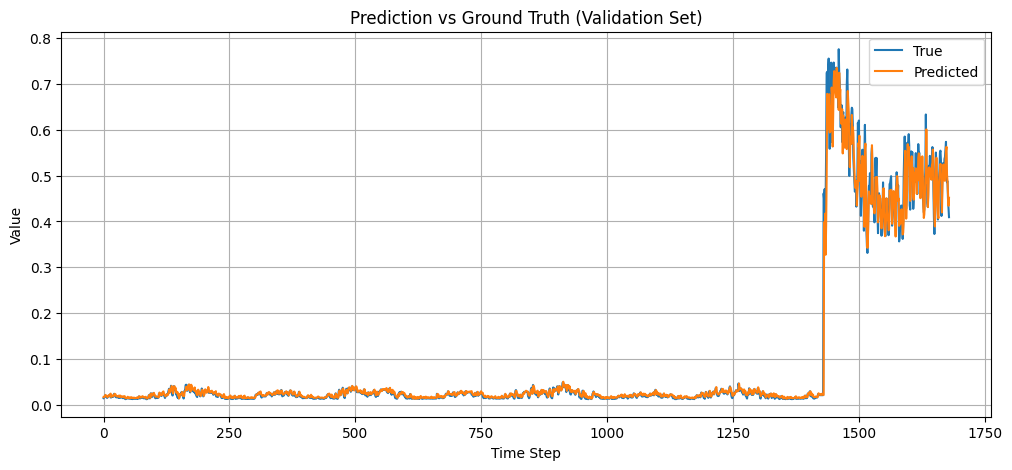

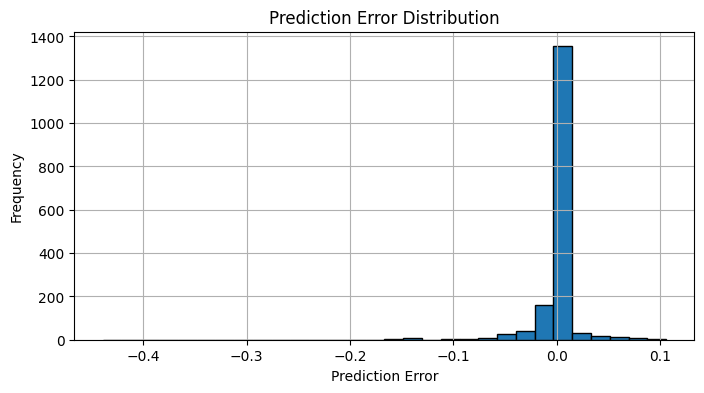


=== LSTM Model Analysis ===


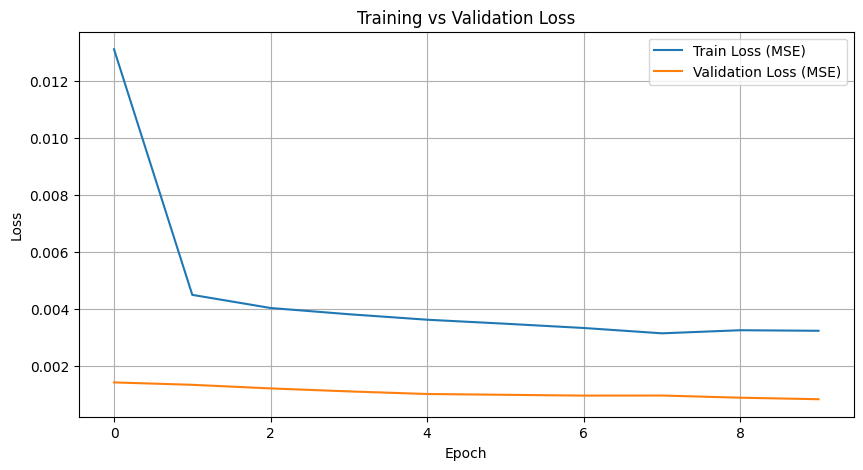

Model Evaluation:
  MSE: 0.0008
  RMSE: 0.0289
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step

Prediction Metrics:
  MAE: 0.0108
  RMSE: 0.0289
  MAPE: 15.95%


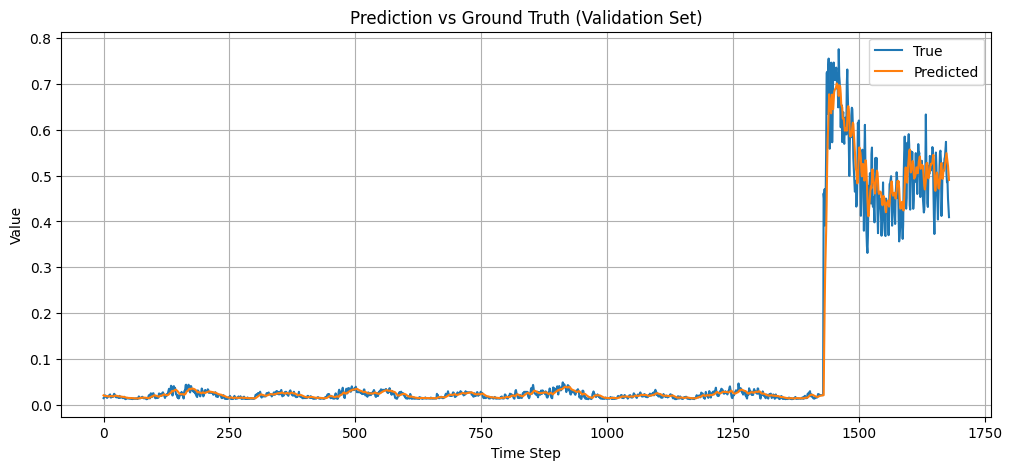

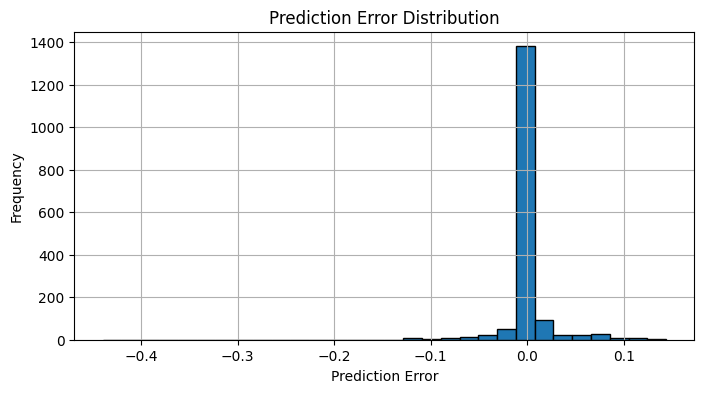

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# === 1. Plot training and validation loss ===
def plot_training_history(history):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Train Loss (MSE)')
    plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training vs Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# === 2. Evaluate model on validation data ===
def evaluate_model(model, X_val, y_val):
    loss, rmse = model.evaluate(X_val, y_val, verbose=0)
    print(f"Model Evaluation:\n  MSE: {loss:.4f}\n  RMSE: {rmse:.4f}")

# === 3. Predict and calculate metrics ===
def prediction_metrics(model, X_val, y_val):
    pred_val = model.predict(X_val).flatten()
    y_val = y_val.flatten()

    errors = pred_val - y_val
    mae = mean_absolute_error(y_val, pred_val)
    rmse = np.sqrt(mean_squared_error(y_val, pred_val))
    mape = np.mean(np.abs(errors / y_val)) * 100

    print(f"\nPrediction Metrics:\n  MAE: {mae:.4f}\n  RMSE: {rmse:.4f}\n  MAPE: {mape:.2f}%")

    return y_val, pred_val, errors

# === 4. Visualize predictions vs true ===
def plot_predictions(y_val, pred_val):
    plt.figure(figsize=(12, 5))
    plt.plot(y_val, label='True')
    plt.plot(pred_val, label='Predicted')
    plt.title('Prediction vs Ground Truth (Validation Set)')
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# === 5. Plot error distribution ===
def plot_error_distribution(errors):
    plt.figure(figsize=(8, 4))
    plt.hist(errors, bins=30, edgecolor='k')
    plt.title('Prediction Error Distribution')
    plt.xlabel('Prediction Error')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# === Run full analysis ===
def full_model_analysis(model, history, X_val, y_val):
    plot_training_history(history)
    evaluate_model(model, X_val, y_val)
    y_val, pred_val, errors = prediction_metrics(model, X_val, y_val)
    plot_predictions(y_val, pred_val)
    plot_error_distribution(errors)

# RNN
print("\n=== RNN Model Analysis ===")
full_model_analysis(rnn_model, rnn_history, X_val, y_val)

# LSTM
print("\n=== LSTM Model Analysis ===")
full_model_analysis(lstm_model, lstm_history, X_val, y_val)

1. Initially, train and validation loss seems to drop significantly for both models. However, we can see from the graph that that seems to be the same for the first five epochs, showing no significant difference after that.

2. The errors shown in model evaluation (MSE, RMSE, MAE, MAPE) in LSTM are higher throughout than RNN, indicating worse validation results, proving that RNN validation set results are better than LSTM.

3. The error distribution shown in LSTM seems to be much concentrated towards the center, showing consistent possible errors. Meanwhile, error distribution in RNN seems to a more even spread.

# 6. Insights

For each step you have done, do an analysis and mention the insights obtained.

EDA:
- The training data and test data are continuous, such that the dates in training data continue on to the test data.
- The values of h1 column vary greatly.
- The training and testing data have very large range, ranging over years of time.

Split:
- Training and validation sets are split regularly based on "train test split" method with ratio of 0.2 (common use) whilst preserving the timestamp order to avoid mismatches.

Cleaning and Preprocessing:
- Duplicates are dropped to remove bias.
- Missing values are filled with linear interpolation which is generally the best handling method.
- Min max scaling is used to normalize the values due to the large variance of h1 values.
- Window scaling is done to use data from previous timestamps as a precondition for RNN.

Modelling:
- The hyperparameters used are:
    + 10 epoch, 32 batch size, 64 units, 100 window size, Adam optimizer
- These hyperparameters are the general values commonly used for both RNN and LSTM, with the additional number of epochs and window size to guarantee that the operations' breath dan depth are enough.

Experiment:
- After trying several different epochs and window sizes, it can be concluded that more epochs and more window sizes , which theoretically should be better, may not always give the best result.
- As larger window sizes are given, RNN's score becomes worse significantly, while LSTM improves gradually.